In [1]:
import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
iris = pd.read_csv('iris.csv')
iris.info()
iris.head(5)
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Design decision 1: The visualization method to show the distribution of the pairwise features of the three species separately

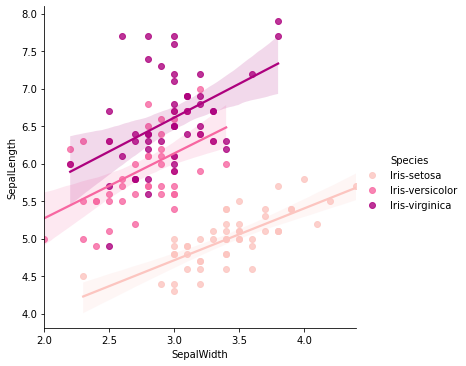

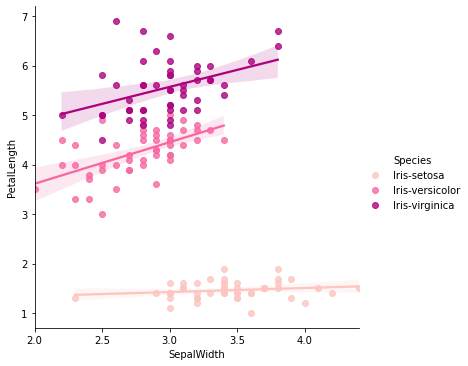

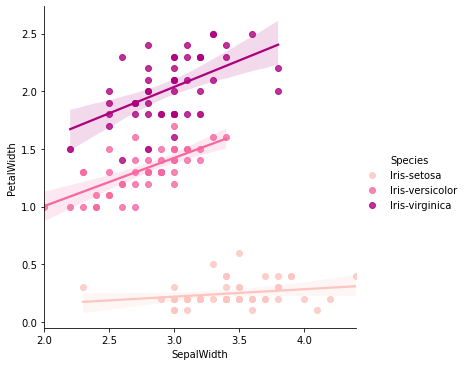

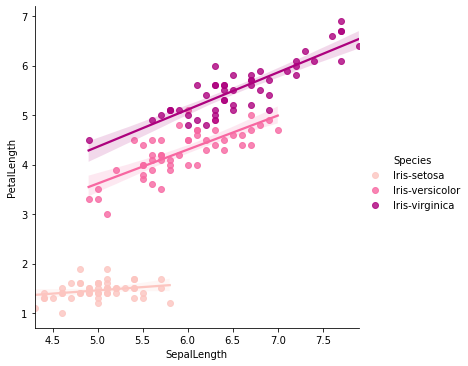

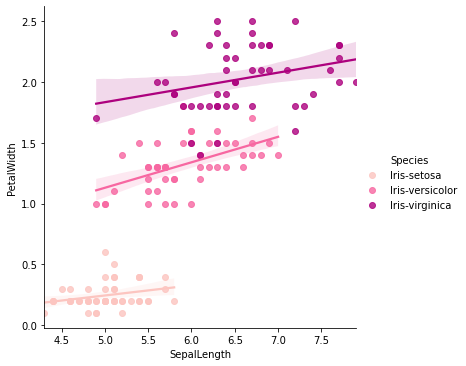

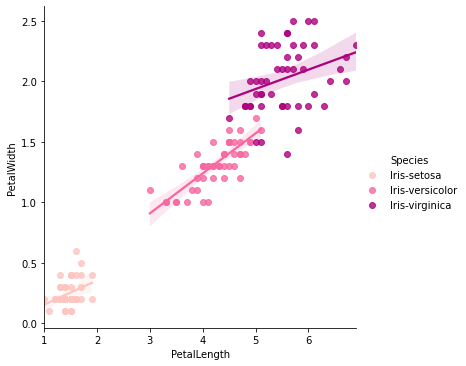

In [3]:
###Scatter plot with regression lines###
# f, axes = plt.subplots(3, 2, figsize=(15, 15))
# # fig = plt.figure(figsize=(15, 15), constrained_layout=False)
# # spec = gridspec.GridSpec(ncols=3, nrows=2)

f_1 = sns.lmplot(data=iris, x='SepalWidth',  y='SepalLength', palette='RdPu', hue='Species')
f_2 = sns.lmplot(data=iris, x='SepalWidth',  y='PetalLength', palette='RdPu', hue='Species')
f_3 = sns.lmplot(data=iris, x='SepalWidth',  y='PetalWidth',  palette='RdPu', hue='Species')
f_4 = sns.lmplot(data=iris, x='SepalLength', y='PetalLength', palette='RdPu', hue='Species')
f_5 = sns.lmplot(data=iris, x='SepalLength', y='PetalWidth',  palette='RdPu', hue='Species')
f_6 = sns.lmplot(data=iris, x='PetalLength', y='PetalWidth',  palette='RdPu', hue='Species')


# Design Decision 2: The number of variables in a kernel density estimate (kde) plot

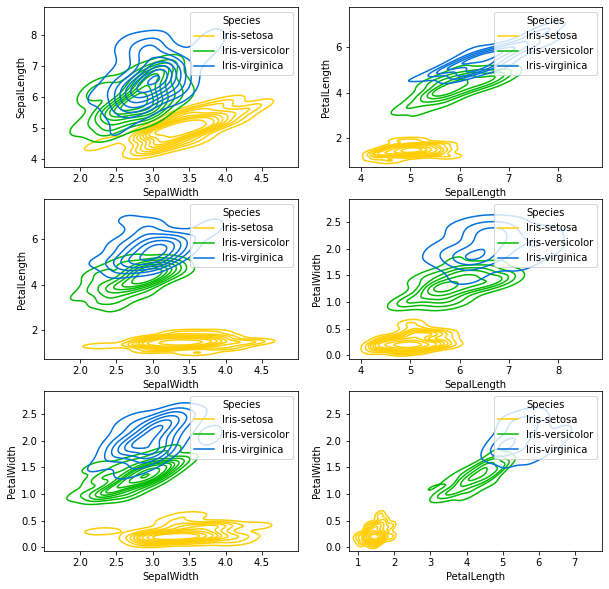

In [4]:
###bivariate-kdeplot###
f, axes = plt.subplots(3, 2, figsize=(10, 10))

swsl = sns.kdeplot(data=iris, x='SepalWidth',  y='SepalLength', palette='nipy_spectral_r', hue='Species', ax = axes[0,0])
swpl = sns.kdeplot(data=iris, x='SepalWidth',  y='PetalLength', palette='nipy_spectral_r', hue='Species', ax = axes[1,0])
swpw = sns.kdeplot(data=iris, x='SepalWidth',  y='PetalWidth',  palette='nipy_spectral_r', hue='Species', ax = axes[2,0])
slpl = sns.kdeplot(data=iris, x='SepalLength', y='PetalLength', palette='nipy_spectral_r', hue='Species', ax = axes[0,1])
slpw = sns.kdeplot(data=iris, x='SepalLength', y='PetalWidth',  palette='nipy_spectral_r', hue='Species', ax = axes[1,1])
plpw = sns.kdeplot(data=iris, x='PetalLength', y='PetalWidth',  palette='nipy_spectral_r', hue='Species', ax = axes[2,1])

# Design Decision 3: The visualization method to present the distribution of each feature among species and its error indication

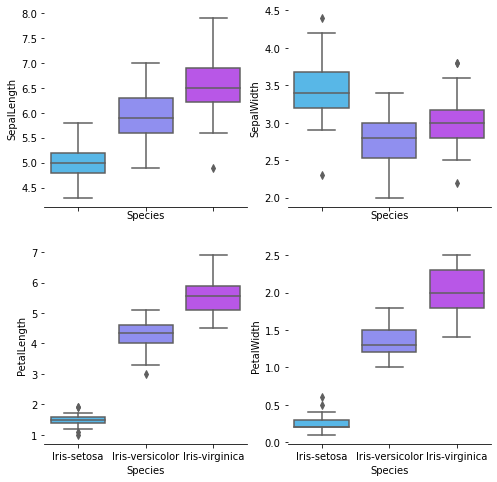

In [5]:
###Box plot###
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.boxplot(x='Species', y='SepalLength', data=iris, palette='cool', ax=axes[0, 0])
sns.boxplot(x='Species', y='SepalWidth', data=iris, palette='cool', ax=axes[0, 1])
sns.boxplot(x='Species', y='PetalLength', data=iris, palette='cool', ax=axes[1, 0])
sns.boxplot(x='Species', y='PetalWidth', data=iris, palette='cool', ax=axes[1, 1])

plt.show()

# Design Decision 4: The visualization method to represent the structure of the whole dataset, i.e. Principal Component Analysis

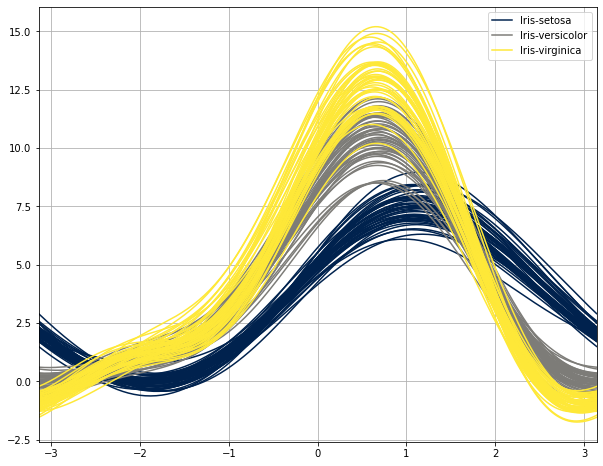

In [6]:
###The Andrew plot###
plt.subplots(figsize = (10,8))
pd.plotting.andrews_curves(iris, 'Species', colormap='cividis')
plt.show()

# Design Decision 5: The visualization method to estimate the central tendency of each feature across iris species

Barplot or Pointplot can estimate central tendency for a numeric variable, besides, there is error bar for each category that indicate the uncertianty.

Explaination:
Point plots are more useful than bar plots comparisons between different levels of categorical variables. 
They are focus on showing the interactions, i.e., relationship between levels of one categorical variable changes across levels of an another categorical variable, for example, the level of sepal length in three species.
The lines that join each point from the categoriy allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

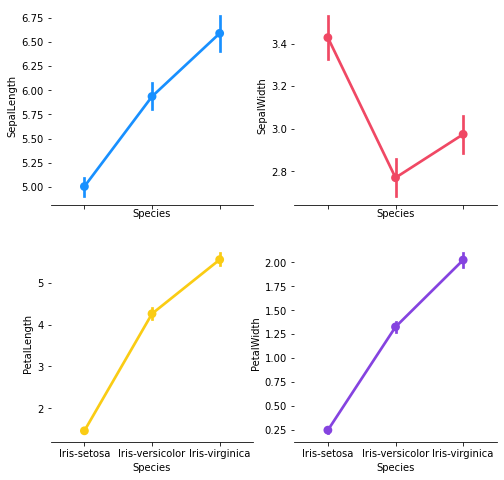

In [8]:
###Point plot###
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.pointplot(data=iris, x='Species', y='SepalLength', color='#1890FF', ax=axes[0, 0])
sns.pointplot(data=iris, x='Species', y='SepalWidth',  color='#F04864', ax=axes[0, 1])
sns.pointplot(data=iris, x='Species', y='PetalLength', color='#FACC14', ax=axes[1, 0])
sns.pointplot(data=iris, x='Species', y='PetalWidth',  color='#8543E0', ax=axes[1, 1])

plt.show()

# Design Decision 6: The data dimension for correlation heatmap

Text(0.5, 1.0, 'Iris-virginica')

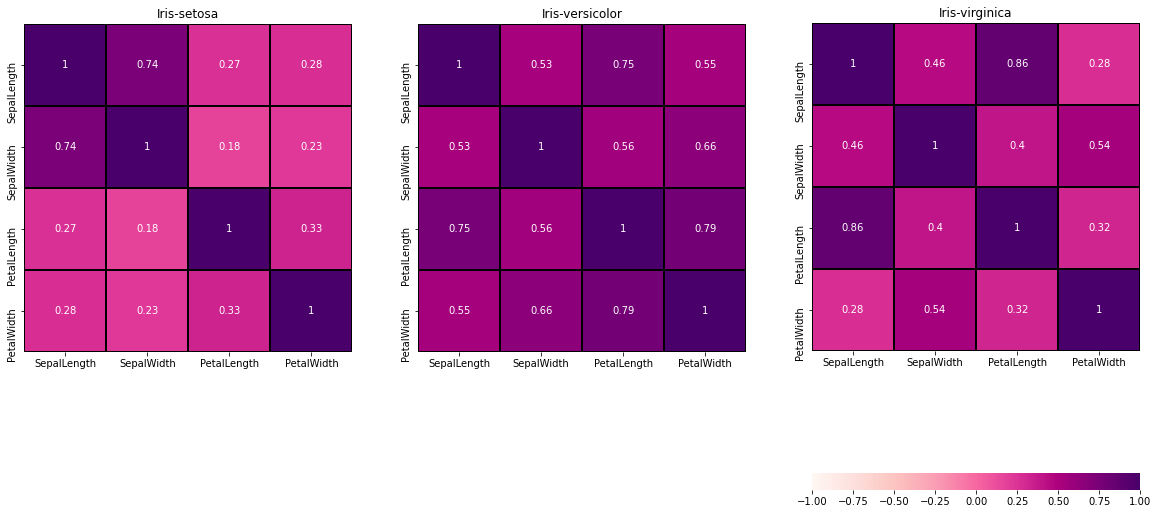

In [9]:
f, axes = plt.subplots(1, 3, figsize=(20, 15))

fig1=plt.gcf()
fig1 = sns.heatmap(iris[iris['Species']=='Iris-setosa'].corr(), annot=True, cmap='RdPu', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=False, ax = axes[0])
fig1.set_title('Iris-setosa')

fig2=plt.gcf()
fig2 = sns.heatmap(iris[iris['Species']=='Iris-versicolor'].corr(), annot=True, cmap='RdPu', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=False, ax = axes[1])
fig2.set_title('Iris-versicolor')

fig3=plt.gcf()
fig3 = sns.heatmap(iris[iris['Species']=='Iris-virginica'].corr(), annot=True, cmap='RdPu', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "horizontal"}, cbar=True, ax = axes[2])
fig3.set_title('Iris-virginica')